<a href="https://colab.research.google.com/github/chunabayashi0216/new_work/blob/main/tounyou_xgb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
pip install japanize-matplotlib

# xgboost
特徴量は層別し　実施
accuracy_ave:  0.7616666666666667

In [247]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

In [248]:
# Load in the train and test datasets
df_train = pd.read_csv('/content/train.csv') #学習データ
df_test = pd.read_csv('/content/test.csv')   #テストデータ

In [249]:
print('The size of the df_train data:' + str(train_raw.shape))
print('The size of the df_test data:' + str(test_raw.shape))


The size of the df_train data:(3000, 10)
The size of the df_test data:(2000, 9)


In [250]:
df_train.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,200,9,125,74,0,0,28.536910,0.444902,45,1
1,3832,4,109,80,0,0,28.047673,0.238243,22,0
2,4927,4,88,78,39,0,52.371341,0.279471,26,0
3,4088,9,125,74,0,0,40.062688,0.203922,45,0
4,3644,5,107,78,44,284,52.935068,0.284959,45,1



*   0	index				BMIint	インデックスとして使用
*   1	Pregnancies			int	妊娠した回数
*   2	Glucose				int	経口ブドウ糖負荷試験における2時間の血漿ブドウ糖濃度
*   3	BloodPressure			int	拡張期血圧
*   4	SkinThickness			int	皮膚のひだの厚さ
*   5	Insulin				int	血清インスリン
*   6	BMI				float	BMI
*   7	Age				int	年齢
*   8	DiabetesPedigreeFunction	float	糖尿病血統
*   9	Outcome				int	糖尿病であるか（糖尿病の場合1、でない場合0）

In [251]:
df_train.describe() # df_fullの要約統計量

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2492.964667,3.557000,113.733667,68.743667,11.164000,11.663333,35.262073,0.400476,28.932000,0.239000
std,1447.218078,3.032131,20.885612,16.332755,14.351159,45.064090,7.568025,0.274666,8.469078,0.426544
min,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000775,0.145844,21.000000,0.000000
25%,1218.750000,1.000000,100.000000,64.000000,0.000000,0.000000,32.301920,0.230987,22.000000,0.000000
50%,2465.500000,3.000000,111.000000,70.000000,0.000000,0.000000,33.835873,0.268674,26.000000,0.000000
75%,3750.250000,6.000000,125.000000,78.000000,24.000000,0.000000,39.578256,0.506778,33.000000,0.000000
max,4999.000000,13.000000,196.000000,110.000000,49.000000,579.000000,53.400629,2.302072,67.000000,1.000000


In [252]:
# 前処理
df_train.info()
print('_'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3000 non-null   int64  
 1   Pregnancies               3000 non-null   int64  
 2   Glucose                   3000 non-null   int64  
 3   BloodPressure             3000 non-null   int64  
 4   SkinThickness             3000 non-null   int64  
 5   Insulin                   3000 non-null   int64  
 6   BMI                       3000 non-null   float64
 7   DiabetesPedigreeFunction  3000 non-null   float64
 8   Age                       3000 non-null   int64  
 9   Outcome                   3000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 234.5 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non

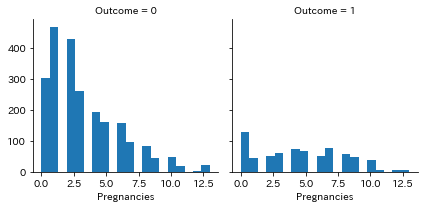

In [253]:
# 1.Pregnancies  妊娠した回数
g = sns.FacetGrid(df_train, col='Outcome')
g.map(plt.hist, 'Pregnancies', bins=20)

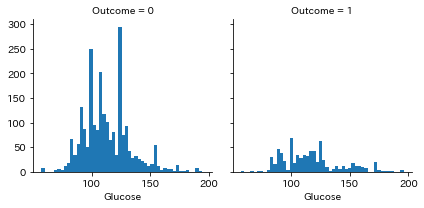

In [254]:
# 2.Glucose int 経口ブドウ糖負荷試験における2時間の血漿ブドウ糖濃度
g = sns.FacetGrid(df_train, col='Outcome')
g.map(plt.hist, 'Glucose', bins=50
      )

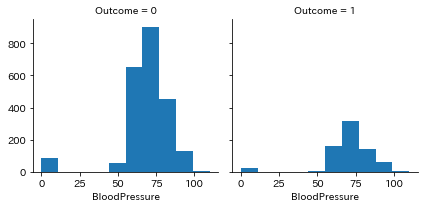

In [255]:
# 3 BloodPressure int 拡張期血圧
g = sns.FacetGrid(df_train, col='Outcome')
g.map(plt.hist, 'BloodPressure', bins=10)

In [256]:
# 3. BloodPressure int 拡張期血圧 異常値あり？
print(df_train[df_train['BloodPressure']<25])

      index  Pregnancies  Glucose  ...  DiabetesPedigreeFunction  Age  Outcome
33     1768            6      117  ...                  0.211526   36        1
58     4798            0      100  ...                  0.793172   27        0
88     4082            1       87  ...                  0.240243   40        0
108    1733            6      105  ...                  0.250061   30        0
154    3827            3       84  ...                  0.263145   29        1
...     ...          ...      ...  ...                       ...  ...      ...
2939   2659            3      161  ...                  0.289017   45        1
2967    544            6       97  ...                  0.202253   30        0
2974    797            6      111  ...                  0.219244   28        0
2983   2893            6      105  ...                  0.287134   39        0
2989   2599            2      117  ...                  0.170535   28        0

[113 rows x 10 columns]


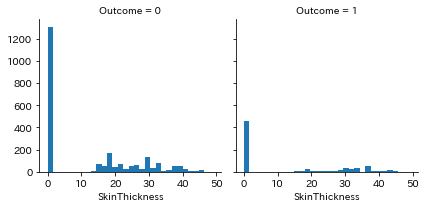

In [257]:
# 4. SkinThickness int 皮膚のひだの厚さ
g = sns.FacetGrid(df_train, col='Outcome')
g.map(plt.hist, 'SkinThickness', bins=30)

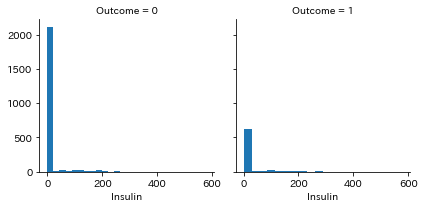

In [258]:
# 5. Insulin int 血清インスリン
g = sns.FacetGrid(df_train, col='Outcome')
g.map(plt.hist, 'Insulin', bins=20)

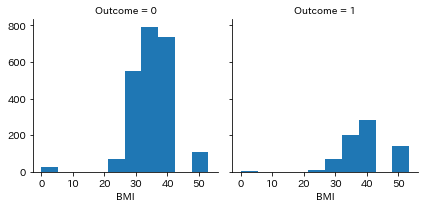

In [259]:
# 6. BMI float BMI
g = sns.FacetGrid(df_train, col='Outcome')
g.map(plt.hist, 'BMI', bins=10)

In [260]:
# 6. BMI float BMI 異常値あり？
print(df_train[df_train['BMI']<10])

      index  Pregnancies  Glucose  ...  DiabetesPedigreeFunction  Age  Outcome
81     3636            2       82  ...                  0.316652   21        0
154    3827            3       84  ...                  0.263145   29        1
319    3043            0       84  ...                  0.300035   39        1
510    1171            7      105  ...                  0.283793   41        0
597    4661            2      115  ...                  0.276749   21        0
860    3857            7      154  ...                  0.254065   43        0
947    2312            3      115  ...                  0.296802   39        0
1006   3322            2      125  ...                  0.294377   22        0
1077   1054            7      106  ...                  0.227734   21        1
1217   3691            2      108  ...                  0.272783   22        0
1242   1758            8       91  ...                  0.249350   21        0
1253   1188            7      164  ...              

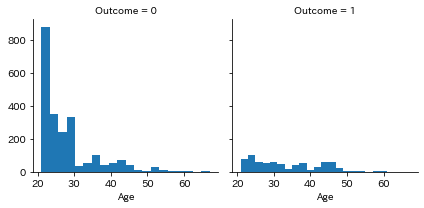

In [261]:
# 7. Age int 年齢
g = sns.FacetGrid(df_train, col='Outcome')
g.map(plt.hist, 'Age', bins=20)

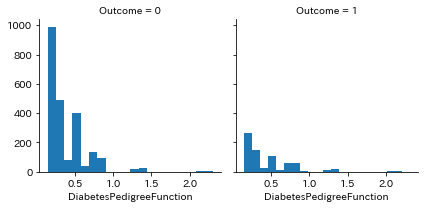

In [262]:
# 8. DiabetesPedigreeFunction float 糖尿病血統
g = sns.FacetGrid(df_train, col='Outcome')
g.map(plt.hist, 'DiabetesPedigreeFunction', bins=20)

In [263]:
# 各特徴量を層別する
print( pd.cut(df_train['Pregnancies'], 5))
print( pd.cut(df_train['Glucose'], 6))
print( pd.cut(df_train['BloodPressure'], 5))
print( pd.cut(df_train['SkinThickness'], 5))
print( pd.cut(df_train['Insulin'], 5))
print( pd.cut(df_train['BMI'], 5))
print( pd.cut(df_train['Age'], 4))
print( pd.cut(df_train['DiabetesPedigreeFunction'], 4))

0         (7.8, 10.4]
1          (2.6, 5.2]
2          (2.6, 5.2]
3         (7.8, 10.4]
4          (2.6, 5.2]
            ...      
2995       (2.6, 5.2]
2996    (-0.013, 2.6]
2997       (5.2, 7.8]
2998    (-0.013, 2.6]
2999    (-0.013, 2.6]
Name: Pregnancies, Length: 3000, dtype: category
Categories (5, interval[float64]): [(-0.013, 2.6] < (2.6, 5.2] < (5.2, 7.8] < (7.8, 10.4] <
                                    (10.4, 13.0]]
0        (103.333, 126.5]
1        (103.333, 126.5]
2       (80.167, 103.333]
3        (103.333, 126.5]
4        (103.333, 126.5]
              ...        
2995    (80.167, 103.333]
2996     (126.5, 149.667]
2997     (103.333, 126.5]
2998     (103.333, 126.5]
2999     (103.333, 126.5]
Name: Glucose, Length: 3000, dtype: category
Categories (6, interval[float64]): [(56.861, 80.167] < (80.167, 103.333] < (103.333, 126.5] <
                                    (126.5, 149.667] < (149.667, 172.833] < (172.833, 196.0]]
0        (66.0, 88.0]
1        (66.0, 88.0]
2   

### train　testデータ編集

In [264]:
df_train['train_or_test'] = 'train' #trainデータの識別カラム追加 
df_test['train_or_test'] = 'test'   #testデータの 識別カラム追加  
df_test['Outcome'] = 9              #testデータ'Outcome'に'9'を仮置き 

# train test 結合

df_all = pd.concat([df_train,df_test],sort=False,axis=0).reset_index(drop=True)

In [265]:
df_all.shape

(5000, 11)

In [266]:
df_all.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,train_or_test
0,200,9,125,74,0,0,28.536910,0.444902,45,1,train
1,3832,4,109,80,0,0,28.047673,0.238243,22,0,train
2,4927,4,88,78,39,0,52.371341,0.279471,26,0,train
3,4088,9,125,74,0,0,40.062688,0.203922,45,0,train
4,3644,5,107,78,44,284,52.935068,0.284959,45,1,train


In [267]:
# Mapping Pregnancies
df_all.loc[ df_all['Pregnancies'] <= 2.6, 'Pregnancies'] = 0
df_all.loc[(df_all['Pregnancies'] > 2.6) & (df_all['Pregnancies'] <= 5.2), 'Pregnancies'] = 1
df_all.loc[(df_all['Pregnancies'] > 5.2) & (df_all['Pregnancies'] <= 7.8), 'Pregnancies'] = 2
df_all.loc[(df_all['Pregnancies'] > 7.8) & (df_all['Pregnancies'] <= 10.4), 'Pregnancies'] = 3
df_all.loc[ df_all['Pregnancies'] > 10.4, 'Pregnancies'] = 4
df_all['Pregnancies'] = df_all['Pregnancies'].astype(int)

# Mapping Glucose
df_all.loc[ df_all['Glucose'] <= 80.167, 'Glucose'] = 0
df_all.loc[(df_all['Glucose'] > 80.167) & (df_all['Glucose'] <= 103.333), 'Glucose'] = 1
df_all.loc[(df_all['Glucose'] > 103.333) & (df_all['Glucose'] <= 126.5), 'Glucose'] = 2
df_all.loc[(df_all['Glucose'] > 126.5) & (df_all['Glucose'] <= 149.667), 'Glucose'] = 3
df_all.loc[(df_all['Glucose'] > 149.667) & (df_all['Glucose'] <= 172.833), 'Glucose'] = 4
df_all.loc[ df_all['Glucose'] > 172.833, 'Glucose'] = 5
df_all['Glucose'] = df_all['Glucose'].astype(int)

# Mapping BloodPressure
df_all.loc[ df_all['BloodPressure'] <= 22.0, 'BloodPressure'] = 0
df_all.loc[(df_all['BloodPressure'] > 22.0) & (df_all['BloodPressure'] <= 44.0), 'BloodPressure'] = 1
df_all.loc[(df_all['BloodPressure'] > 44.0) & (df_all['BloodPressure'] <= 66.0), 'BloodPressure'] = 2
df_all.loc[(df_all['BloodPressure'] > 66.0) & (df_all['BloodPressure'] <= 88.0), 'BloodPressure'] = 3
df_all.loc[ df_all['BloodPressure'] > 88.0, 'BloodPressure'] = 4
df_all['BloodPressure'] = df_all['BloodPressure'].astype(int)

# Mapping SkinThickness
df_all.loc[ df_all['SkinThickness'] <= 9.8, 'SkinThickness'] = 0
df_all.loc[(df_all['SkinThickness'] > 9.8) & (df_all['SkinThickness'] <= 19.6), 'SkinThickness'] = 1
df_all.loc[(df_all['SkinThickness'] > 19.6) & (df_all['SkinThickness'] <= 29.4), 'SkinThickness'] = 2
df_all.loc[(df_all['SkinThickness'] > 29.4) & (df_all['SkinThickness'] <= 39.2), 'SkinThickness'] = 3
df_all.loc[ df_all['SkinThickness'] > 39.2, 'SkinThickness'] = 4
df_all['SkinThickness'] = df_all['SkinThickness'].astype(int)

# Mapping Insulin
df_all.loc[ df_all['Insulin'] <= 115.8, 'Insulin'] = 0
df_all.loc[(df_all['Insulin'] > 115.8) & (df_all['Insulin'] <= 231.6), 'Insulin'] = 1
df_all.loc[(df_all['Insulin'] > 231.6) & (df_all['Insulin'] <= 347.4), 'Insulin'] = 2
df_all.loc[(df_all['Insulin'] > 347.4) & (df_all['Insulin'] <= 463.2), 'Insulin'] = 3
df_all.loc[ df_all['Insulin'] > 463.2, 'Insulin'] = 4
df_all['Insulin'] = df_all['Insulin'].astype(int)

# Mapping BMI
df_all.loc[ df_all['BMI'] <= 10.681, 'BMI'] = 0
df_all.loc[(df_all['BMI'] > 10.681) & (df_all['BMI'] <= 21.361), 'BMI'] = 1
df_all.loc[(df_all['BMI'] > 21.36) & (df_all['BMI'] <= 32.041), 'BMI'] = 2
df_all.loc[(df_all['BMI'] > 32.041) & (df_all['BMI'] <= 42.721), 'BMI'] = 3
df_all.loc[ df_all['BMI'] > 42.721, 'BMI'] = 4
df_all['BMI'] = df_all['BMI'].astype(int)

# Mapping Age
df_all.loc[ df_all['Age'] <= 32.5, 'Age'] = 0
df_all.loc[(df_all['Age'] > 32.5) & (df_all['Age'] <= 44.0), 'Age'] = 1
df_all.loc[(df_all['Age'] > 44.0) & (df_all['Age'] <= 55.5), 'Age'] = 2
df_all.loc[ df_all['Age'] > 55.5, 'Age'] = 3
df_all['Age'] = df_all['Age'].astype(int)

# Mapping DiabetesPedigreeFunction
#df_all.loc[ df_all['DiabetesPedigreeFunction'] <= 0.685, 'DiabetesPedigreeFunction'] = 0
#df_all.loc[(df_all['DiabetesPedigreeFunction'] > 0.685) & (df_all['DiabetesPedigreeFunction'] <= 1.224), 'DiabetesPedigreeFunction'] = 1
#df_all.loc[(df_all['DiabetesPedigreeFunction'] > 1.224) & (df_all['DiabetesPedigreeFunction'] <= 1.763), 'DiabetesPedigreeFunction'] = 2
#df_all.loc[ df_all['DiabetesPedigreeFunction'] > 1.763, 'DiabetesPedigreeFunction'] = 3
#df_all['DiabetesPedigreeFunction'] = df_all['DiabetesPedigreeFunction'].astype(int)

# age education-num(mean = 0 std = 1 で正則化) -> age_sc education-num_sc
# 平均＝0、分散＝1　にスケーリング

from sklearn.preprocessing import StandardScaler

df_all['DiabetesPedigreeFunction'] = StandardScaler().fit_transform(np.array(df_all['DiabetesPedigreeFunction'].values).reshape(-1, 1))

In [268]:
df_all.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,train_or_test
0,200,3,2,3,0,0,2,0.161694,2,1,train
1,3832,1,2,3,0,0,2,-0.599224,0,0,train
2,4927,1,1,3,3,0,4,-0.447421,0,0,train
3,4088,3,2,3,0,0,3,-0.725592,2,0,train
4,3644,1,2,3,4,2,4,-0.427214,2,1,train


In [269]:
# train test データ　を　戻す
df_train = df_all.query('train_or_test == "train"')
df_test = df_all.query('train_or_test == "test"')

# モデル　検証　データ作成

X = df_train.drop(columns=['index', 'Outcome', 'train_or_test'])     # モデル train 
y = df_train['Outcome']                                     # モデル y 
test = df_test.drop(columns=['index', 'Outcome', 'train_or_test'])   # テスト test

In [270]:
print('X.shape = ', X.shape)
print('y.shape = ', y.shape)
print('test.shape = ', test.shape)

X.shape =  (3000, 8)
y.shape =  (3000,)
test.shape =  (2000, 8)


In [271]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,2,3,0,0,2,0.161694,2
1,1,2,3,0,0,2,-0.599224,0
2,1,1,3,3,0,4,-0.447421,0
3,3,2,3,0,0,3,-0.725592,2
4,1,2,3,4,2,4,-0.427214,2


In [272]:
from sklearn.model_selection import train_test_split

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y )


print('X = ', X.shape)
print('y = ', y.shape)
print('test = ', test.shape)
print('X_train = ', X_train.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

X =  (3000, 8)
y =  (3000,)
test =  (2000, 8)
X_train =  (2400, 8)
X_test =  (600, 8)
y_train =  (2400,)
y_test =  (600,)


## xgboost(単体 パラメーターはDefult)

In [273]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


# パラメータ設定
params = {
    "objective": "binary:logistic",
    "evel_metric": "auc",
    "eta": 0.3,
    "max_depth": 6,                    
    "subsample": 1,                  
    "colsample_bytree":1 ,
    "silent" : 1
}

# 訓練・テストデータの設定
#
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# モデル作成
bst = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=100,
                  early_stopping_rounds=10,
                  evals=[(dtest, 'test')]
                  ) 

# 検証用データが各クラスに分類される確率を計算する
preds = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
# しきい値 0.5 で 0, 1 に丸める
pred = np.where(preds > 0.5, 1, 0)
# 精度 (Accuracy) を検証する
acc = accuracy_score(y_test, pred)
print('Accuracy:', acc)

[0]	test-error:0.228333
Will train until test-error hasn't improved in 10 rounds.
[1]	test-error:0.211667
[2]	test-error:0.216667
[3]	test-error:0.215
[4]	test-error:0.206667
[5]	test-error:0.223333
[6]	test-error:0.215
[7]	test-error:0.216667
[8]	test-error:0.225
[9]	test-error:0.225
[10]	test-error:0.225
[11]	test-error:0.226667
[12]	test-error:0.228333
[13]	test-error:0.226667
[14]	test-error:0.225
Stopping. Best iteration:
[4]	test-error:0.206667

Accuracy: 0.7933333333333333


In [274]:
from sklearn.model_selection import train_test_split

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y )

# データを格納する
# テスト用
xgb_test = xgb.DMatrix(X_test, label=y_test)

# 5-fold CVモデルの学習
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# 5つのモデルを保存するリストの初期化
models = []
#accuracy、loglossを保存するNumPy配列の初期化
accuracies = np.array([])
loglosses = np.array([])

for fold_, (train_index, eval_index) in enumerate(kf.split(X_train, y_train)):    
    print(f'fold{fold_ + 1} start')
    X_train_cv = X_train.iloc[train_index]
    y_train_cv = y_train.iloc[train_index]
    X_eval_cv = X_train.iloc[eval_index]
    y_eval_cv = y_train.iloc[eval_index]
    
    # 学習用
    xgb_train = xgb.DMatrix(X_train_cv, label=y_train_cv)

    # 検証用
    xgb_eval = xgb.DMatrix(X_eval_cv, label=y_eval_cv)
   
    
    # パラメータを設定(defult)
    xgb_params = {
        "objective": "binary:logistic",
        "evel_metric": "auc",
        "eta": 0.3,
        "max_depth": 6,                    
        "subsample": 1,                  
        "colsample_bytree":1 ,
        "silent" : 1
    }  
    
    # 学習
    evals = [(xgb_train, 'train'), (xgb_eval, 'eval')] # 学習に用いる検証用データ
    evaluation_results = {}                            # 学習の経過を保存する箱
    bst = xgb.train(xgb_params,                        # 上記で設定したパラメーター
                    xgb_train,                         # 使用するデータセット
                    num_boost_round=500,               # 学習の回数
                    early_stopping_rounds=10,          # アーリーストッピング
                    evals=evals,                       # 上記で設定した検証用データ
                    evals_result=evaluation_results,   # 上記で設定した箱
                    verbose_eval=0                     # 学習の経過の表示(非表示)
                    ) 
    
    # テストデータで予測する
    y_pred = bst.predict(xgb_test, ntree_limit=bst.best_ntree_limit)
        
    # しきい値 0.5 で 0, 1 に丸める
    pred = np.where(y_pred > 0.5, 1, 0)
    
    # 精度 (Accuracy) を検証する
    accuracy = accuracy_score(y_test, pred)

    # Logloss を計算する
    logloss = log_loss(y_test, y_pred)
    
    print('accuracy:', accuracy, 'logloss: ', logloss)
    
    # 学習が終わったモデルをリストに入れておく
    models.append(bst) 
    # 学習結果をNumPy配列に入れておく
    accuracies = np.append(accuracies, accuracy)
    loglosses = np.append(loglosses, logloss)
    
# 正解ラベルの確率とLogloss（平均値）
print('accuracy_ave: ', np.mean(accuracies), 'logloss_ave: ', np.mean(loglosses))

fold1 start
accuracy: 0.775 logloss:  0.49967417545616627
fold2 start
accuracy: 0.7666666666666667 logloss:  0.4853709570566813
fold3 start
accuracy: 0.7616666666666667 logloss:  0.47248687341964496
fold4 start
accuracy: 0.7766666666666666 logloss:  0.48789881884120406
fold5 start
accuracy: 0.7933333333333333 logloss:  0.45540913836409647
accuracy_ave:  0.7746666666666667 logloss_ave:  0.4801679926275586


In [275]:
#グリッドサーチでよいパラメータを調べる　例として'max_depth'　'eta'

gridsearch_params = [
    (max_depth, eta)
    for max_depth in [3, 4, 5, 6, 7, 8, 9, 10]
    for eta in [0.05, 0.04, 0.03, 0.02, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
]
gridsearch_params

[(3, 0.05),
 (3, 0.04),
 (3, 0.03),
 (3, 0.02),
 (3, 0.01),
 (3, 0.1),
 (3, 0.2),
 (3, 0.3),
 (3, 0.4),
 (3, 0.5),
 (4, 0.05),
 (4, 0.04),
 (4, 0.03),
 (4, 0.02),
 (4, 0.01),
 (4, 0.1),
 (4, 0.2),
 (4, 0.3),
 (4, 0.4),
 (4, 0.5),
 (5, 0.05),
 (5, 0.04),
 (5, 0.03),
 (5, 0.02),
 (5, 0.01),
 (5, 0.1),
 (5, 0.2),
 (5, 0.3),
 (5, 0.4),
 (5, 0.5),
 (6, 0.05),
 (6, 0.04),
 (6, 0.03),
 (6, 0.02),
 (6, 0.01),
 (6, 0.1),
 (6, 0.2),
 (6, 0.3),
 (6, 0.4),
 (6, 0.5),
 (7, 0.05),
 (7, 0.04),
 (7, 0.03),
 (7, 0.02),
 (7, 0.01),
 (7, 0.1),
 (7, 0.2),
 (7, 0.3),
 (7, 0.4),
 (7, 0.5),
 (8, 0.05),
 (8, 0.04),
 (8, 0.03),
 (8, 0.02),
 (8, 0.01),
 (8, 0.1),
 (8, 0.2),
 (8, 0.3),
 (8, 0.4),
 (8, 0.5),
 (9, 0.05),
 (9, 0.04),
 (9, 0.03),
 (9, 0.02),
 (9, 0.01),
 (9, 0.1),
 (9, 0.2),
 (9, 0.3),
 (9, 0.4),
 (9, 0.5),
 (10, 0.05),
 (10, 0.04),
 (10, 0.03),
 (10, 0.02),
 (10, 0.01),
 (10, 0.1),
 (10, 0.2),
 (10, 0.3),
 (10, 0.4),
 (10, 0.5)]

In [276]:

min_logless = float('Inf')
min_score = float('Inf')

best_param = []
min_train_error_mean = float('Inf')
min_test_error_mean = float('Inf')


for max_depth, eta in gridsearch_params:
    print('max_depth={}, eta={}'.format(max_depth, eta))
    
    params['max_depth'] = max_depth
    params['eta'] = eta
    
    cv_results = xgb.cv(
        params,
        dtrain,
 #       num_boost_round=1000, 
        num_boost_round=10,
        seed=0,
        nfold=5,
 #       metrics={'rmse'},
        early_stopping_rounds=5
    )
    
    train_error_mean = cv_results['train-error-mean'].min()
    test_error_mean = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['train-error-mean'].argmin()
    print('train-error-mean {} train-error-mean {} for {} rounds'.format(train_error_mean, test_error_mean, boost_rounds))
    if train_error_mean < min_train_error_mean:
        min_train_error_mean = train_error_mean
        min_test_error_mean = test_error_mean
        best_param = (max_depth, eta)
    
print('Best params {}, train_error_mean {},  test_error_mean {}'.format(best_param, train_error_mean, test_error_mean))

max_depth=3, eta=0.05
train-error-mean 0.2205208 train-error-mean 0.22583319999999998 for 0 rounds
max_depth=3, eta=0.04
train-error-mean 0.21781240000000004 train-error-mean 0.225 for 8 rounds
max_depth=3, eta=0.03
train-error-mean 0.2205208 train-error-mean 0.22583319999999998 for 0 rounds
max_depth=3, eta=0.02
train-error-mean 0.2205208 train-error-mean 0.22583319999999998 for 0 rounds
max_depth=3, eta=0.01
train-error-mean 0.2205208 train-error-mean 0.22583319999999998 for 0 rounds
max_depth=3, eta=0.1
train-error-mean 0.21479179999999998 train-error-mean 0.22333340000000002 for 9 rounds
max_depth=3, eta=0.2
train-error-mean 0.21458339999999998 train-error-mean 0.2245834 for 4 rounds
max_depth=3, eta=0.3
train-error-mean 0.21510440000000003 train-error-mean 0.2245834 for 2 rounds
max_depth=3, eta=0.4
train-error-mean 0.2205208 train-error-mean 0.22583319999999998 for 0 rounds
max_depth=3, eta=0.5
train-error-mean 0.2205208 train-error-mean 0.22583319999999998 for 0 rounds
max_depth

In [278]:
# train_feature, train_tagert を学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y )

# データを格納する
# テスト用
xgb_test = xgb.DMatrix(X_test, label=y_test)

# 5-fold CVモデルの学習
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# 5つのモデルを保存するリストの初期化
models = []
#accuracy、loglossを保存するNumPy配列の初期化
accuracies = np.array([])
loglosses = np.array([])

for fold_, (train_index, eval_index) in enumerate(kf.split(X_train, y_train)):    
    print(f'fold{fold_ + 1} start')
    X_train_cv = X_train.iloc[train_index]
    y_train_cv = y_train.iloc[train_index]
    X_eval_cv = X_train.iloc[eval_index]
    y_eval_cv = y_train.iloc[eval_index]
    
    # 学習用
    xgb_train = xgb.DMatrix(X_train_cv, label=y_train_cv)

    # 検証用
    xgb_eval = xgb.DMatrix(X_eval_cv, label=y_eval_cv)
   
    
    # パラメータを設定(defult)
    xgb_params = {
        "objective": "binary:logistic",
        "evel_metric": "auc",
        "eta":0.5,
        "max_depth": 9,                    
        "subsample": 1,                  
        "colsample_bytree":1 ,
        "silent" : 1
    }  
    
    # 学習
    evals = [(xgb_train, 'train'), (xgb_eval, 'eval')] # 学習に用いる検証用データ
    evaluation_results = {}                            # 学習の経過を保存する箱
    bst = xgb.train(xgb_params,                        # 上記で設定したパラメーター
                    xgb_train,                         # 使用するデータセット
                    num_boost_round=500,               # 学習の回数
                    early_stopping_rounds=10,          # アーリーストッピング
                    evals=evals,                       # 上記で設定した検証用データ
                    evals_result=evaluation_results,   # 上記で設定した箱
                    verbose_eval=0                     # 学習の経過の表示(非表示)
                    ) 
    
    # テストデータで予測する
    y_pred = bst.predict(xgb_test, ntree_limit=bst.best_ntree_limit)
        
    # しきい値 0.5 で 0, 1 に丸める
    pred = np.where(y_pred > 0.5, 1, 0)
    
    # 精度 (Accuracy) を検証する
    accuracy = accuracy_score(y_test, pred)

    # Logloss を計算する
    logloss = log_loss(y_test, y_pred)
    
    print('accuracy:', accuracy, 'logloss: ', logloss)
    
    # 学習が終わったモデルをリストに入れておく
    models.append(bst) 
    # 学習結果をNumPy配列に入れておく
    accuracies = np.append(accuracies, accuracy)
    loglosses = np.append(loglosses, logloss)
    
# 正解ラベルの確率とLogloss（平均値）
print('accuracy_ave: ', np.mean(accuracies), 'logloss_ave: ', np.mean(loglosses))

fold1 start
accuracy: 0.7533333333333333 logloss:  0.5227650197440138
fold2 start
accuracy: 0.755 logloss:  0.5539837482074896
fold3 start
accuracy: 0.7733333333333333 logloss:  0.5318820925219916
fold4 start
accuracy: 0.7533333333333333 logloss:  0.5526858707562011
fold5 start
accuracy: 0.7733333333333333 logloss:  0.4844260938667382
accuracy_ave:  0.7616666666666667 logloss_ave:  0.5291485650192869
